In [1]:
import pandas as pd
import numpy as np
import folium

import geopy.distance
from geopy.distance import lonlat, distance
import matplotlib.pyplot as plt
from folium import plugins
import seaborn as sns
import geopandas as gpd
import plot_func as pf
sns.set_style("darkgrid")
sns.set_context("notebook")
current_palette = sns.color_palette("hls", 8)

In [2]:
ls data

crime_astros_final.csv*  crime_ru_final.csv*      crime_uh_final.csv*
crime_dynamo_final.csv*  crime_texans_final.csv*


In [3]:
path = 'data/crime_astros_final.csv'
beat1 = 'beat_geojson/1A10.geojson'
beat2 = 'beat_geojson/10H30.geojson'
beat3 = 'beat_geojson/10H10.geojson'
stadium_l = [29.756944, -95.355556]

In [4]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date',
                       'Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
df = df.set_index('date').sort_index(ascending=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23947 entries, 2010-01-01 to 2017-12-31
Data columns (total 14 columns):
Beat            23947 non-null object
OffenseType     23947 non-null object
Premise         23947 non-null object
NumOffenses     23947 non-null float64
hour            23947 non-null int64
day             23947 non-null int64
weekday         23947 non-null object
month           23947 non-null object
year            23947 non-null int64
lat             23947 non-null float64
lon             23947 non-null float64
add             23947 non-null object
dist_stadium    23947 non-null float64
game            23947 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 2.7+ MB


In [5]:
df.game.value_counts()

No Game      18139
Lost Game     3007
Won Game      2801
Name: game, dtype: int64

In [6]:
df['game_on'] = np.where(df.game =='No Game',0,1)

In [7]:
df['game_on'].value_counts(dropna=False)

0    18139
1     5808
Name: game_on, dtype: int64

In [8]:
df['game'].value_counts(dropna=False)

No Game      18139
Lost Game     3007
Won Game      2801
Name: game, dtype: int64

In [9]:
df.drop(['game'],axis=1,inplace=True)

In [10]:
df.head()

,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game_on
date,,,,,,,,,,,,,,
2010-01-01,1A10,Auto Theft,bar/night club parking lot,1.0,0,1,Friday,Jan,2010,29.757212,-95.353294,"350 Hamilton St, Houston, TX 77002, USA",0.137184,0
2010-01-01,1A10,Theft,bar/night club,1.0,0,1,Friday,Jan,2010,29.753512,-95.363811,"1250 Caroline St, Houston, TX 77002, USA",0.549562,0
2010-01-01,1A10,Burglary,office building,1.0,0,1,Friday,Jan,2010,29.760954,-95.362089,"450 S Main St, Houston, TX 77002, USA",0.480008,0
2010-01-01,1A10,Theft,other/unknown,1.0,0,1,Friday,Jan,2010,29.755595,-95.367677,"1250 Travis St, Houston, TX 77002, USA",0.734357,0
2010-01-01,1A10,Theft,convention center/exhibit halls,1.0,0,1,Friday,Jan,2010,29.752015,-95.359181,"1050 Avenida De Las Americas, Houston, TX 7701...",0.403381,0


## Display

In [11]:
two_mile =  df.dist_stadium <= 2.0
more_mile = df.dist_stadium > 1.0 
one_mile =  df.dist_stadium <= 1.0
h_mile = df.dist_stadium < 0.5
q_mile = df.dist_stadium < 0.25

In [12]:
two = df[two_mile]
one = df[one_mile]
half = df[h_mile]
qtr =  df[q_mile]

In [13]:
m = folium.Map(stadium_l,     tiles='Stamen Toner',
zoom_start=14)

# convert to (n, 2) nd-array format for heatmap
stationArr = one[['lat', 'lon']].as_matrix()
folium.Marker(stadium_l, popup='<i>Astros Stadium</i>').add_to(m)


# add beat geojson file
folium.GeoJson(beat1,
    name='geojson'
).add_to(m)


# add beat geojson file
folium.GeoJson(beat2,
    name='geojson'
).add_to(m)

# add beat geojson file
folium.GeoJson(beat3,
    name='geojson'
).add_to(m)



# folium.Circle(
#     radius=1609,
#     location=stadium_l,
#     popup='The Waterfront',
#     color='crimson',
#     fill=False,
# ).add_to(m)

# plot heatmap
m.add_child(plugins.HeatMap(stationArr.tolist(), radius=15))

m

In [14]:
one.OffenseType.value_counts()

Theft                 13667
Auto Theft             1588
Aggravated Assault     1111
Burglary                836
Robbery                 758
Rape                    154
Murder                   15
Name: OffenseType, dtype: int64

In [15]:
pt = pf.offense_df(one)
df_aa = one[pt['Aggravated Assault']]
df_b = one[pt['Burglary']]
df_t = one[pt['Theft']]
df_at = one[pt['Auto Theft']]
df_ra = one[pt['Rape']]
df_ro = one[pt['Robbery']]
df_mu = one[pt['Murder']]

In [16]:
def time_plot6d(f1,f1_name,f2,f2_name,f3,f3_name,f4,f4_name,f5,f5_name,f6,f6_name,col,title,xlab,ylab,save=False):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.hour)['{}'.format(col)].count().plot()
    ax = f3.groupby(f3.hour)['{}'.format(col)].count().plot()
    ax = f4.groupby(f4.hour)['{}'.format(col)].count().plot()
    ax = f5.groupby(f5.hour)['{}'.format(col)].count().plot()
    ax = f6.groupby(f6.hour)['{}'.format(col)].count().plot()
    
    ax.set_xticks(np.arange(0, 24))

    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name,f3_name,f4_name,f5_name,f6_name],
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    if save == True:
        plt.savefig('{}.png'.format(title), dpi = 600, facecolor='w',
                edgecolor='w',transparent=True, 
                bbox_inches=None, pad_inches=0.1, frameon=False)
    plt.show()


In [17]:
def time_plot5d(f1,f1_name,f2,f2_name,f3,f3_name,f4,f4_name,f5,f5_name,col,title,xlab,ylab,save=False):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.hour)['{}'.format(col)].count().plot()
    ax = f3.groupby(f3.hour)['{}'.format(col)].count().plot()
    ax = f4.groupby(f4.hour)['{}'.format(col)].count().plot()
    ax = f5.groupby(f5.hour)['{}'.format(col)].count().plot()
    
    ax.set_xticks(np.arange(0, 24))

    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name,f3_name,f4_name,f5_name],
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    if save == True:
        plt.savefig('{}.png'.format(title), dpi = 600, facecolor='w',
                edgecolor='w',transparent=True, 
                bbox_inches=None, pad_inches=0.1, frameon=False)
    plt.show()


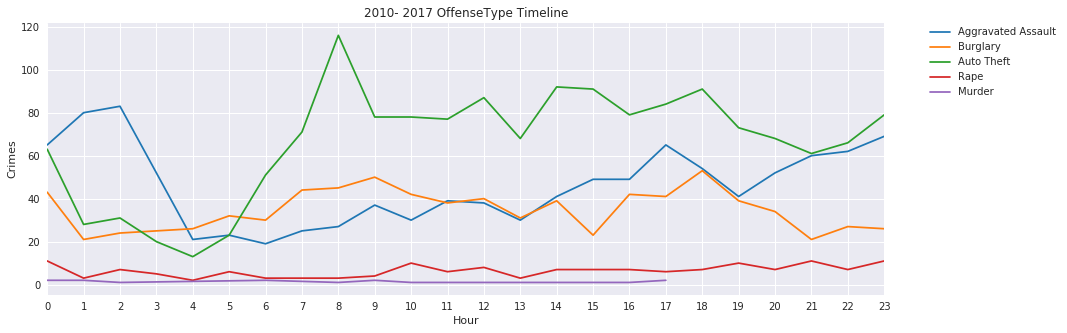

In [18]:
title = '2010- 2017 OffenseType Timeline'
xlab = 'Hour'
ylab= 'Crimes'
time_plot5d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab)

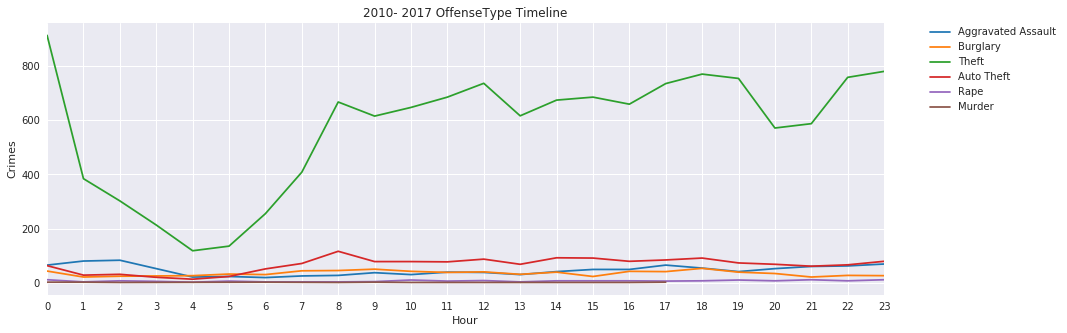

In [19]:
title = '2010- 2017 OffenseType Timeline'
xlab = 'Hour'
ylab= 'Crimes'
time_plot6d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_t,'Theft',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab)

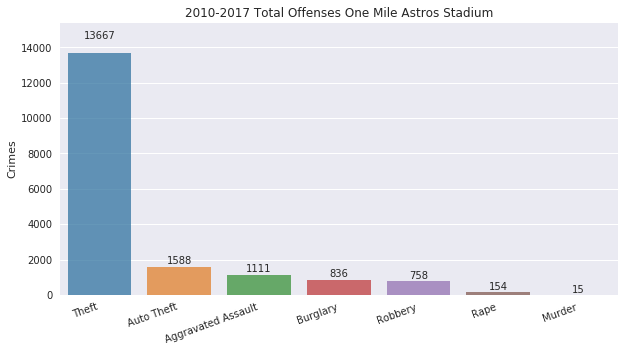

In [20]:
t='2010-2017 Total Offenses One Mile Astros Stadium'
xlab = ''
ylab = 'Crimes'

pf.barplot(one,'OffenseType',t,xlab,ylab)

# No game v game
display crime when there is no game vs game

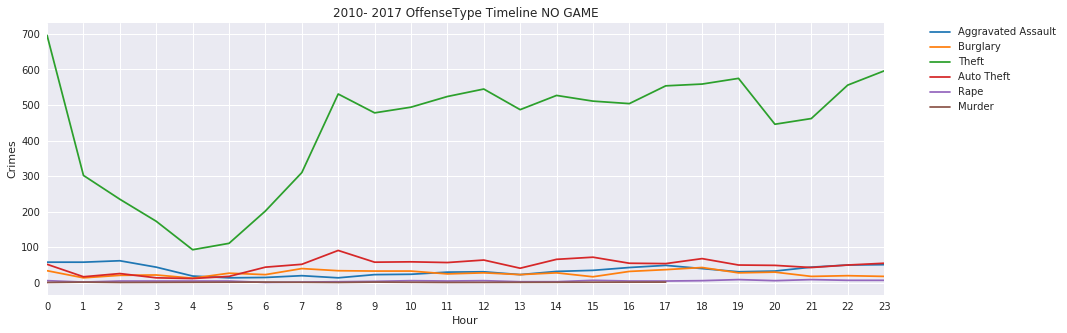

In [21]:
nogame = one.game_on == 0
one_nogame = one[nogame]

pt = pf.offense_df(one_nogame)
df_aa = one_nogame[pt['Aggravated Assault']]
df_b = one_nogame[pt['Burglary']]
df_t = one_nogame[pt['Theft']]
df_at = one_nogame[pt['Auto Theft']]
df_ra = one_nogame[pt['Rape']]
df_ro = one_nogame[pt['Robbery']]
df_mu = one_nogame[pt['Murder']]



title = '2010- 2017 OffenseType Timeline NO GAME'
xlab = 'Hour'
ylab= 'Crimes'
time_plot6d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_t,'Theft',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab)

In [22]:
m = folium.Map(stadium_l,     tiles='Stamen Toner',
zoom_start=14)

# convert to (n, 2) nd-array format for heatmap
stationArr = df_aa[['lat', 'lon']].as_matrix()
folium.Marker(stadium_l, popup='<i>Astros Stadium</i>').add_to(m)


folium.Circle(
    radius=1609,
    location=stadium_l,
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

# plot heatmap
m.add_child(plugins.HeatMap(stationArr.tolist(), radius=15))

m

In [23]:
m = folium.Map(stadium_l,     tiles='Stamen Toner',
zoom_start=14)

# convert to (n, 2) nd-array format for heatmap
stationArr = df_b[['lat', 'lon']].as_matrix()
folium.Marker(stadium_l, popup='<i>Astros Stadium</i>').add_to(m)


folium.Circle(
    radius=1609,
    location=stadium_l,
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

# plot heatmap
m.add_child(plugins.HeatMap(stationArr.tolist(), radius=15))

m

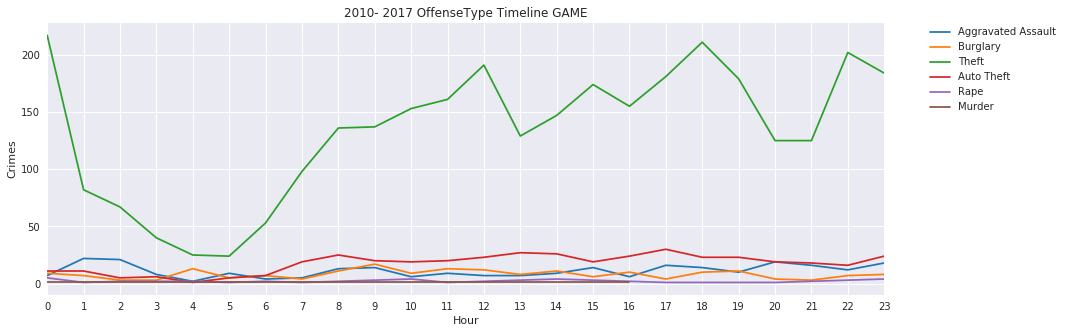

In [24]:
yesgame = one.game_on == 1
one_game = one[yesgame]

pt = pf.offense_df(one_game)
df_aa = one_game[pt['Aggravated Assault']]
df_b = one_game[pt['Burglary']]
df_t = one_game[pt['Theft']]
df_at = one_game[pt['Auto Theft']]
df_ra = one_game[pt['Rape']]
df_ro = one_game[pt['Robbery']]
df_mu = one_game[pt['Murder']]



title = '2010- 2017 OffenseType Timeline GAME'
xlab = 'Hour'
ylab= 'Crimes'
time_plot6d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_t,'Theft',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab)

In [25]:
from ipywidgets import interact

schemes = ["normal.day", "normal.night"]

@interact(lat=(-90., 90.), lon=(-180., 180.), zoom=(0, 18), scheme=schemes, show_url=False)
def get_here_maptile(lat=52.518611, lon=13.408333, zoom=11, scheme="normal.day", show_url=False):
    x, y = deg2tile(lat, lon, zoom)
    params = dict(x=x, y=y, zoom=zoom, scheme=scheme, app_id=app_id, app_code=app_code)
    url = "https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/{scheme}/{zoom}/{x}/{y}/256/png8?lg=eng&app_id={app_id}&app_code={app_code}".format(**params)
    if show_url:
        print(url)
    return Image(url=url)

interactive(children=(FloatSlider(value=52.518611, description='lat', max=90.0, min=-90.0), FloatSlider(value=13.408333, description='lon', max=180.0, min=-180.0), IntSlider(value=11, description='zoom', max=18), Dropdown(description='scheme', options=('normal.day', 'normal.night'), value='normal.day'), Checkbox(value=False, description='show_url'), Output()), _dom_classes=('widget-interact',))

In [26]:
import folium
from ipywidgets import interact

# Cloudmade Mapbox needs an API key, Mapbox Control Room is limited to a few levels
tiles = [name.strip() for name in """
    OpenStreetMap
    Mapbox Bright
    Mapbox Control Room
    Stamen Terrain
    Stamen Toner
    Stamen Watercolor
    CartoDB positron
    CartoDB dark_matter""".strip().split('\n')]

@interact(lat=(-90., 90.), lon=(-180., 180.), tiles=tiles, zoom=(1, 18))
def create_map(lat=52.518611, lon=13.408333, tiles="Stamen Toner", zoom=10):
    return folium.Map(location=(lat, lon), tiles=tiles, zoom_start=zoom)

interactive(children=(FloatSlider(value=52.518611, description='lat', max=90.0, min=-90.0), FloatSlider(value=13.408333, description='lon', max=180.0, min=-180.0), Dropdown(description='tiles', index=4, options=('OpenStreetMap', 'Mapbox Bright', 'Mapbox Control Room', 'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 'CartoDB positron', 'CartoDB dark_matter'), value='Stamen Toner'), IntSlider(value=10, description='zoom', max=18, min=1), Output()), _dom_classes=('widget-interact',))

In [27]:
import folium
from ipywidgets import interact

cities = ["Berlin", "Paris", "Chicago", "Singapore"]
examples = ["Traffic", "Truck info", "Transit", "Regular", "Satellite"]
@interact(city=cities, example=examples)
def show_canned_examples(city, example):
    attr = "HERE.com"
    latlon_for_city = {
        "Berlin": (52.518611, 13.408333), 
        "Paris": (48.8567, 2.3508), 
        "Chicago": (41.88416, -87.63243),
        "Singapore": (1.283333, 103.833333)
    }
    zoom = 14
    queries = {
        "Traffic":
            "https://1.traffic.maps.api.here.com/maptile/2.1/traffictile/newest/normal.traffic.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Regular":
            "https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Truck info":
            "https://1.base.maps.api.here.com/maptile/2.1/trucktile/newest/normal.day.grey/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Transit":
            "https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day.transit/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Satellite":
            "https://1.aerial.maps.api.here.com/maptile/2.1/maptile/newest/hybrid.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
    }
    return folium.Map(location=latlon_for_city[city], tiles=queries[example],attr=attr, zoom_start=zoom)

interactive(children=(Dropdown(description='city', options=('Berlin', 'Paris', 'Chicago', 'Singapore'), value='Berlin'), Dropdown(description='example', options=('Traffic', 'Truck info', 'Transit', 'Regular', 'Satellite'), value='Traffic'), Output()), _dom_classes=('widget-interact',))

In [28]:
import folium
from ipywidgets import interact
#[29.756944, -95.355556]

# Cloudmade Mapbox needs an API key, Mapbox Control Room is limited to a few levels
tiles = [name.strip() for name in """
    OpenStreetMap
    Mapbox Bright
    Mapbox Control Room
    Stamen Terrain
    Stamen Toner
    Stamen Watercolor
    CartoDB positron
    CartoDB dark_matter""".strip().split('\n')]

@interact(
    lat=(-90., 90.),
    lon=(-180., 180.), 
    tiles=tiles, 
    zoom=(1, 18))


def create_map(lat=29.756944, lon=-95.355556, tiles="Stamen Toner", zoom=10):
    return folium.Map(location=(lat, lon), zoom_start=zoom)



interactive(children=(FloatSlider(value=29.756944, description='lat', max=90.0, min=-90.0), FloatSlider(value=-95.355556, description='lon', max=180.0, min=-180.0), Dropdown(description='tiles', index=4, options=('OpenStreetMap', 'Mapbox Bright', 'Mapbox Control Room', 'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 'CartoDB positron', 'CartoDB dark_matter'), value='Stamen Toner'), IntSlider(value=10, description='zoom', max=18, min=1), Output()), _dom_classes=('widget-interact',))

In [29]:
one.OffenseType.unique()

array(['Auto Theft', 'Theft', 'Burglary', 'Rape', 'Aggravated Assault',
       'Robbery', 'Murder'], dtype=object)

In [30]:
import folium
from ipywidgets import interact

cities = ["Theft", "Auto Theft", "Burglary", "Rape"]
examples = ["Traffic", "Truck info", "Transit", "Regular", "Satellite"]
@interact(city=cities, example=examples)
def show_canned_examples(city, example):
    attr = "HERE.com"
    latlon_for_city = {
        "Berlin": (52.518611, 13.408333), 
        "Paris": (48.8567, 2.3508), 
        "Chicago": (41.88416, -87.63243),
        "Singapore": (1.283333, 103.833333)
    }
    zoom = 14
    queries = {
        "Traffic":
            "https://1.traffic.maps.api.here.com/maptile/2.1/traffictile/newest/normal.traffic.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Regular":
            "https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Truck info":
            "https://1.base.maps.api.here.com/maptile/2.1/trucktile/newest/normal.day.grey/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Transit":
            "https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day.transit/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
        "Satellite":
            "https://1.aerial.maps.api.here.com/maptile/2.1/maptile/newest/hybrid.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s" % (app_id, app_code),
    }
    return folium.Map(location=latlon_for_city[city], tiles=queries[example],attr=attr, zoom_start=zoom)

interactive(children=(Dropdown(description='city', options=('Theft', 'Auto Theft', 'Burglary', 'Rape'), value='Theft'), Dropdown(description='example', options=('Traffic', 'Truck info', 'Transit', 'Regular', 'Satellite'), value='Traffic'), Output()), _dom_classes=('widget-interact',))

In [31]:


f = branca.element.Figure()

# Create two maps.
# m = folium.Map(
#     location=[0, 0],
#     tiles='stamenwatercolor',
#     zoom_start=1,
#     position='absolute',
#     left='0%',
#     width='50%',
#     height='50%'
# )


m = folium.Map(stadium_l,
    tiles='Stamen Toner',
    zoom_start=12,
    position='absolute',
    left='0%',
    width='50%',
    height='50%'
)
burg = df_b[['lat', 'lon']].as_matrix()

m.add_child(plugins.HeatMap(burg.tolist(), radius=15))

#--------------------------
m2 = folium.Map(stadium_l,
    tiles='Stamen Toner',
    zoom_start=12,
    position='absolute',
    left='50%',
    width='50%',
    height='50%',
    top='50%',
)
aga = df_aa[['lat', 'lon']].as_matrix()

m2.add_child(plugins.HeatMap(aga.tolist(), radius=15))


m3 = folium.Map(stadium_l,
    tiles='Stamen Toner',
    zoom_start=12,
    position='absolute',
    left='50%',
    width='50%',
    height='50%'
)
mur = df_mu[['lat', 'lon']].as_matrix()

m3.add_child(plugins.HeatMap(mur.tolist(), radius=15))


m4 = folium.Map(stadium_l,
    tiles='Stamen Toner',
    zoom_start=12,
    position='absolute',
    left='0%',
    width='50%',
    height='50%',
    top='50%'
)
rap = df_ra[['lat', 'lon']].as_matrix()

m4.add_child(plugins.HeatMap(rap.tolist(), radius=15))



# m2 = folium.Map(
#     location=[46, 3],
#     tiles='OpenStreetMap',
#     zoom_start=4,
#     position='absolute',
#     left='50%',
#     width='50%',
#     height='50%',
#     top='50%')

# m2 = folium.Map(stadium_l,
#                tiles='Stamen Toner',
#                    zoom_start=15,
#     position='absolute',
#     left='50%',
#     width='50%',
#     height='50%',
#     top='50%'
# )





# # Create two Vega.
# v = features.VegaLite(
#     data,
#     position='absolute',
#     left='50%',
#     width='50%',
#     height='50%'
# )

# v2 = features.VegaLite(
#     data,
#     position='absolute',
#     left='0%',
#     width='50%',
#     height='50%',
#     top='50%'
# )

f.add_child(m)
f.add_child(m2)
f.add_child(m3)
f.add_child(m4)

#f.save(os.path.join('results', 'Features_5.html'))

f

NameError: name 'branca' is not defined

In [ ]:
yesgame = one.game_on == 1
one_game = one[yesgame]
one_game.info()

In [ ]:


m = folium.Map(stadium_l,     tiles='Stamen Toner',
zoom_start=14)

# convert to (n, 2) nd-array format for heatmap
crime_nogame = one_nogame[['lat', 'lon']].as_matrix()
crime_game = one_game[['lat', 'lon']].as_matrix()

folium.Marker(stadium_l, popup='<i>Astros Stadium</i>').add_to(m)


# add beat geojson file
folium.GeoJson(beat1,
    name='geojson'
).add_to(m)


# add beat geojson file
folium.GeoJson(beat2,
    name='geojson'
).add_to(m)

# add beat geojson file
folium.GeoJson(beat3,
    name='geojson'
).add_to(m)



folium.Circle(
    radius=1609,
    location=stadium_l,
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

# plot heatmap
#m.add_child(plugins.HeatMap(stationArr.tolist(), radius=15))
m.add_child(plugins.HeatMap(crime_game.tolist(), radius=15,gradient={ 1: 'yellow'}))

m.add_child(plugins.HeatMap(crime_nogame.tolist(), radius=5,gradient={ 1: 'green'}))

m

In [ ]:
yesgame = one.game_on == 1
one_game = one[yesgame]



m = folium.Map(stadium_l,     tiles='Stamen Toner',
zoom_start=14)

# convert to (n, 2) nd-array format for heatmap
stationArr = one_game[['lat', 'lon']].as_matrix()
folium.Marker(stadium_l, popup='<i>Astros Stadium</i>').add_to(m)


# add beat geojson file
folium.GeoJson(beat1,
    name='geojson'
).add_to(m)


# add beat geojson file
folium.GeoJson(beat2,
    name='geojson'
).add_to(m)

# add beat geojson file
folium.GeoJson(beat3,
    name='geojson'
).add_to(m)



folium.Circle(
    radius=1609,
    location=stadium_l,
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

# plot heatmap
m.add_child(plugins.HeatMap(stationArr.tolist(), radius=15))

m

# cleanup columns

In [ ]:
print(list(df.columns))

In [ ]:
#data = df[[  'OffenseType', 'Hour', 'day', 'weekday', 'month', 'year','dist_stadium', 'game']]
data = df[[  'OffenseType', 'Hour','dist_stadium', 'game_on']]

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.Hour = data.Hour.astype(int)
#data.day = data.day.astype(int)
#data.year = data.year.astype(int)

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
dfdu = pd.get_dummies(data)

In [ ]:
dfdu.info()

In [ ]:
dfdu.head()

In [ ]:
dfdu.describe()

In [ ]:
sns.pairplot(dfdu, hue="game_on")

In [ ]:
# reg = smf.ols(formula = "api00 ~ yr_rnd", data = elemapi2_sel).fit()
# reg.summary()

In [ ]:
dfdu